In [24]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings(action="ignore")

titanic_df = pd.read_csv("titanic_train.csv")
titanic_df.head()
titanic_df.dropna(inplace=True)
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [25]:
titanic_df.dropna(inplace=True)
titanic_df["Sex"] = titanic_df.Sex.replace({'male':0,'female':1})
titanic_df["Embarked"] = titanic_df.Embarked.replace({'S':1,'C':2,'Q':3})
y = titanic_df['Survived']
X = titanic_df[['Sex','Age','SibSp','Parch','Embarked']]


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print("Number of data points in training set:  {}  ".format(len(X_train)))
print("Number of targets in training set    :  {}\n".format(len(y_train)))

print("Number of data points in test set    :  {}  ".format(len(X_test)))
print("Number of targets in test set        :  {}  ".format(len(y_test)))

Number of data points in training set:  146  
Number of targets in training set    :  146

Number of data points in test set    :  37  
Number of targets in test set        :  37  


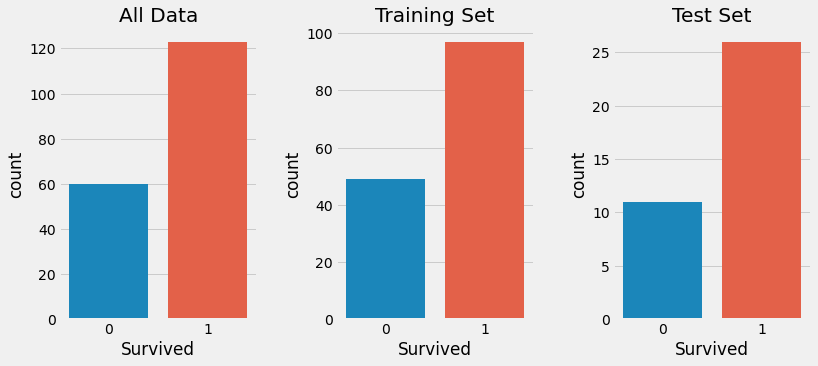

Proportion of '0' in all data     : %33 
Proportion of '0' in training set : %34 
Proportion of '0' in test set     : %30 


In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,5))
plt.style.use('fivethirtyeight')
plt.subplots_adjust(wspace=0.4)

plt.subplot(131)
sns.countplot(y)
plt.title("All Data")

plt.subplot(132)
sns.countplot(y_train)
plt.title("Training Set")

plt.subplot(133)
sns.countplot(y_test)
plt.title("Test Set")

plt.show()

print("Proportion of '0' in all data     : %{:.0f} ".format(len(y[y==0])/len(y)*100))
print("Proportion of '0' in training set : %{:.0f} ".format(len(y_train[y_train==0])/len(y_train)*100))
print("Proportion of '0' in test set     : %{:.0f} ".format(len(y_test[y_test==0])/len(y_test)*100))

In [28]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

model.score(X_test, y_test)

0.7837837837837838

**Modelin doğruluk oranı %78 çıktı.**

In [29]:
pieces = kf.split(X)

for num, (train_index, test_index) in enumerate(pieces):
    print("No.{} Train set size : {}".format(num+1,len(train_index)))
    print("No.{} Test set size     : {}".format(num+1,len(test_index)))
    print('-'*28, "\n")

No.1 Train set size : 146
No.1 Test set size     : 37
---------------------------- 

No.2 Train set size : 146
No.2 Test set size     : 37
---------------------------- 

No.3 Train set size : 146
No.3 Test set size     : 37
---------------------------- 

No.4 Train set size : 147
No.4 Test set size     : 36
---------------------------- 

No.5 Train set size : 147
No.5 Test set size     : 36
---------------------------- 



In [35]:
from sklearn.metrics import mean_squared_error

model2 = LogisticRegression()

pieces = kf.split(X)
score_list = []

for a, (train_indeks, test_indeks) in enumerate(pieces):
    X_train, y_train = X.iloc[train_index], y.iloc[train_index]

    X_test, y_test = X.iloc[test_index], y.iloc[test_index]

    
    model2.fit(X_train, y_train)
    
    prediction = model2.predict(X_test)
    
    score = model.score(X_test, y_test)  
    score_list.append(score)
    
    print("Piece No.{} score: {:.5f}".format(a+1,score))
    print("-"*23, "\n")
    

Piece No.1 score: 0.80556
----------------------- 

Piece No.2 score: 0.80556
----------------------- 

Piece No.3 score: 0.80556
----------------------- 

Piece No.4 score: 0.80556
----------------------- 

Piece No.5 score: 0.80556
----------------------- 



In [36]:
print("Mean score : {:.2f}".format(np.mean(score_list)))

Mean score : 0.81


**KFold Cross Validation ile Ortalama olarak doğruluk oranı %81 çıktı.**

In [37]:
from sklearn.model_selection import cross_validate, cross_val_score
log_reg_model = LogisticRegression()

cv = cross_validate(estimator=log_reg_model,
                    X=X,
                    y=y,
                    cv=10,
                    return_train_score=True,
                   )

print('Train Scores :', cv['train_score'], sep = '\n')
print("-"*50)
print('Test Scores     :', cv['test_score'], sep = '\n')

Train Scores :
[0.77439024 0.76219512 0.75       0.78181818 0.78181818 0.78181818
 0.76969697 0.79393939 0.76969697 0.76363636]
--------------------------------------------------
Test Scores     :
[0.78947368 0.78947368 0.84210526 0.83333333 0.55555556 0.83333333
 0.66666667 0.61111111 0.83333333 0.72222222]


In [38]:
print('Mean score of train set : ', cv['train_score'].mean())
print('Mean score of test set  : ', cv['test_score'].mean())

Mean score of train set :  0.77290096082779
Mean score of test set  :  0.7476608187134502


**Eğitim kümesinin başarısı %77 çıktı. Test kümesinin %74 çıktı.**

In [53]:
cv = cross_val_score(estimator=log_reg_model,
                     X=X,
                     y=y,
                     cv=10,
                    )

print('Model Scores : ', cv, sep = '\n')
print("Mean score : {:.2f}".format(np.mean(cv)))

Model Scores : 
[0.78947368 0.78947368 0.84210526 0.83333333 0.55555556 0.83333333
 0.66666667 0.61111111 0.83333333 0.72222222]
Mean score : 0.75


**cross_val_score()  ile doğruluk oranı %75 çıktı.**

In [42]:
from sklearn.model_selection import cross_val_predict

y_pred = cross_val_predict(estimator=log_reg_model,
                           X=X,
                           y=y,
                           cv=10,
                          )
print(y_pred[0:10])

[1 1 0 1 1 0 0 1 1 0]


**Hiperparametreleri değiştirerek deneyelim.**

**Grid Search yapalım**

In [44]:
import warnings
warnings.filterwarnings('ignore')
parameters = {"C": [10 ** x for x in range (-5, 5, 1)],
              "penalty": ['l1', 'l2']
             }
from sklearn.model_selection import GridSearchCV

grid_cv = GridSearchCV(estimator=log_reg_model,
                       param_grid = parameters,
                       cv = 10
                      )

grid_cv.fit(X, y)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                               1000, 10000],
                         'penalty': ['l1', 'l2']})

In [45]:
print("Best Parameters : ", grid_cv.best_params_)
print("Best Score      : ", grid_cv.best_score_)

Best Parameters :  {'C': 10, 'penalty': 'l2'}
Best Score      :  0.7637426900584796


In [48]:
import pandas as pd

results = grid_cv.cv_results_

df = pd.DataFrame(results)
df = df[['param_penalty','param_C', 'mean_test_score']]
df = df.sort_values(by='mean_test_score', ascending = False)
df.head(10)

,param_penalty,param_C,mean_test_score
13,l2,10,0.763743
15,l2,100,0.763743
17,l2,1000,0.763743
19,l2,10000,0.763743
9,l2,0.1,0.747661
11,l2,1,0.747661
7,l2,0.01,0.726316
5,l2,0.001,0.704678
1,l2,0.00001,0.671930
3,l2,0.0001,0.666374


**Grid search'de l2 ve c=10 ile en iyi doğruluk oranı %76 çıktı.**

**Random Search ile yapalım.**

In [50]:
parameters = {"C": [10 ** x for x in range (-5, 5, 1)],
              "penalty": ['l1', 'l2']
             }
from sklearn.model_selection import RandomizedSearchCV

rs_cv = RandomizedSearchCV(estimator=log_reg_model,
                           param_distributions = parameters,
                           cv = 10,
                           n_iter = 10,
                           random_state = 111,
                           scoring = 'precision'
                      )

rs_cv.fit(X, y)

RandomizedSearchCV(cv=10, estimator=LogisticRegression(),
                   param_distributions={'C': [1e-05, 0.0001, 0.001, 0.01, 0.1,
                                              1, 10, 100, 1000, 10000],
                                        'penalty': ['l1', 'l2']},
                   random_state=111, scoring='precision')

In [51]:
print("Best parameters      : ", rs_cv.best_params_, "\n")
print("All precision values : ", rs_cv.cv_results_['mean_test_score'], "\n")
print("Best precision value : ", rs_cv.best_score_)

Best parameters      :  {'penalty': 'l2', 'C': 10} 

All precision values :  [0.66996904 0.70179739 0.85480866 0.81505286        nan 0.85480866
        nan        nan        nan        nan] 

Best precision value :  0.8548086635586636


In [52]:
results_rs = rs_cv.cv_results_

df_rs = pd.DataFrame(results_rs)
df_rs = df_rs[['param_penalty','param_C', 'mean_test_score']]
df_rs = df_rs.sort_values(by='mean_test_score', ascending = False)

df_rs

,param_penalty,param_C,mean_test_score
2,l2,10,0.854809
5,l2,1000,0.854809
3,l2,1,0.815053
1,l2,0.001,0.701797
0,l2,0.0001,0.669969
4,l1,100,NaN
6,l1,0.01,NaN
7,l1,0.001,NaN
8,l1,1000,NaN
9,l1,0.00001,NaN


**Yapılan eşleştirmeler sonucu l2 ve c=10 da Random search ile doğruluk oranı %85 çıktı.**